In [57]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [59]:
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset","Train")
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path = os.path.join(current_directory, "dataset","Test")

In [60]:
print("Current Working Directory:",os.getcwd())
print(train_path)
train_path = r"c:\Users\Usha\OneDrive\Desktop\New folder\dataset\Train"


Current Working Directory: c:\Users\Usha\OneDrive\Desktop\New folder
c:\Users\Usha\OneDrive\Desktop\New folder\dataset\Train


In [61]:
training_set = tf.keras.utils.image_dataset_from_directory(
  "C:/Users/Usha/OneDrive/Desktop/New folder/3.Potato Leaf Disease Detection/dataset/Test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [62]:
lables= training_set.class_names

In [63]:
print(lables)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [65]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/Usha/OneDrive/Desktop/New folder/3.Potato Leaf Disease Detection/dataset/Valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [80]:
cnn1 = tf.keras.models.Sequential()

In [81]:
cnn1 = tf.keras.models.Sequential()

cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn1.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn1.add(tf.keras.layers.Dropout(0.25))

cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn1.add(tf.keras.layers.Dropout(0.4))

cnn1.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\Usha\OneDrive\Desktop\New folder\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
cnn1.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [83]:
cnn1.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_120 (Conv2D)             │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_121 (Conv2D)             │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_122 (Conv2D)             │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_123 (Conv2D)             │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_124 (Conv2D)             │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_125 (Conv2D)             │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_126 (Conv2D)             │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_127 (Conv2D)             │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_128 (Conv2D)             │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_129 (Conv2D)             │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 651ms/step - accuracy: 0.3042 - loss: 1.6956 - val_accuracy: 0.3333 - val_loss: 1.0826
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 569ms/step - accuracy: 0.3741 - loss: 1.0820 - val_accuracy: 0.6700 - val_loss: 1.0040
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 581ms/step - accuracy: 0.5842 - loss: 0.9387 - val_accuracy: 0.5167 - val_loss: 0.8924
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6342 - loss: 0.7549 - val_accuracy: 0.5933 - val_loss: 0.8748
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 763ms/step - accuracy: 0.5915 - loss: 0.8113 - val_accuracy: 0.6800 - val_loss: 0.6698
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 593ms/step - accuracy: 0.7138 - loss: 0.5756 - val_accuracy: 0.7433 - val_loss: 0.5344
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 583ms/step - accuracy: 0.7354 - loss: 0.5413 - val_accuracy: 0.7300 - val_loss: 0.5325
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 591ms/step - accuracy: 0.7277 - loss: 0.5531 - val_accuracy: 0.7

In [85]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:',train_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.9013 - loss: 0.2593
Training accuracy: 0.8966666460037231


In [86]:
cnn.save('trained_plant_disease_model.keras')

In [87]:
epoch=[i for i in range(1,11)]

In [88]:
training_history.history

{'accuracy': [0.30666667222976685,
  0.3799999952316284,
  0.6333333253860474,
  0.6333333253860474,
  0.6366666555404663,
  0.7233333587646484,
  0.7599999904632568,
  0.7333333492279053,
  0.7833333611488342,
  0.8533333539962769],
 'loss': [1.426476001739502,
  1.0768805742263794,
  0.8705549836158752,
  0.7615121603012085,
  0.7459410429000854,
  0.5571368336677551,
  0.5036978721618652,
  0.5598254203796387,
  0.4721100926399231,
  0.36288198828697205],
 'val_accuracy': [0.3333333432674408,
  0.6700000166893005,
  0.5166666507720947,
  0.5933333039283752,
  0.6800000071525574,
  0.7433333396911621,
  0.7300000190734863,
  0.7333333492279053,
  0.7266666889190674,
  0.79666668176651],
 'val_loss': [1.082557201385498,
  1.0040475130081177,
  0.8923587203025818,
  0.8748103976249695,
  0.669814944267273,
  0.5343506932258606,
  0.5324950218200684,
  0.6037512421607971,
  0.5185276865959167,
  0.40030765533447266]}

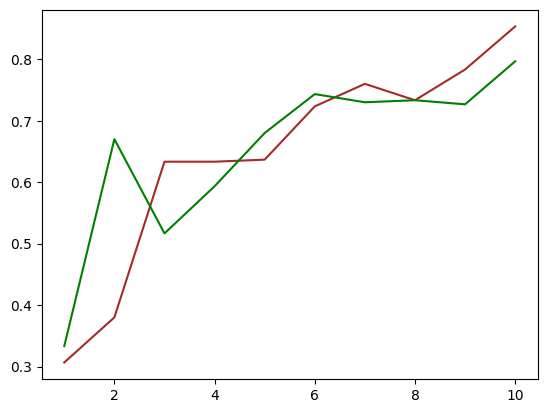

In [92]:
plt.plot(epoch,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epoch,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')